# This Part-II deals with clustering
### In Part-I we did data preprocessing and feature transformation from time domain to frequency domain.
### The FFT plots of all 5 accelerometer values show:
**x-axis -> frequency**  &  **y-axis -> acceleration**

### These x-axis and y-axis values corresponding to each individual accelerometer are stored in FFTMGCplus_1.csv, FFTMGCplus_2.csv, FFTMGCplus_3.csv, FFTMGCplus_4.csv, FFTMGCplus_5.csv respectively.

## We will use KMeans clustering

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [20]:
df5=pd.read_csv('FFTMGCplus_5.csv')
df4=pd.read_csv('FFTMGCplus_4.csv')
df3=pd.read_csv('FFTMGCplus_3.csv')
df2=pd.read_csv('FFTMGCplus_2.csv')
df1=pd.read_csv('FFTMGCplus_2.csv')

df5=np.array(df5)
df4=np.array(df4)
df3=np.array(df3)
df2=np.array(df2)
df1=np.array(df1)

df5=df5.reshape(df5.shape[0],2)
df4=df4.reshape(df4.shape[0],2)
df3=df3.reshape(df3.shape[0],2)
df2=df2.reshape(df2.shape[0],2)
df1=df1.reshape(df1.shape[0],2)

xs5=df5[:,0]
ys5=df5[:,1]

xs4=df4[:,0]
ys4=df4[:,1]


xs3=df3[:,0]
ys3=df3[:,1]


xs2=df2[:,0]
ys2=df2[:,1]


xs1=df1[:,0]
ys1=df1[:,1]

### First let's train our model on FFTMGCplus_5 data

In [21]:
model=KMeans(n_clusters=3)
model.fit(df5)
labels5= model.labels_

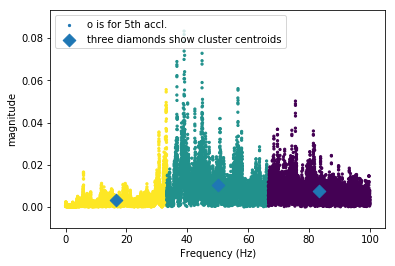

In [22]:
plt.scatter(xs5, ys5, c=labels5, marker='.', label='o is for 5th accl.',s=20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('magnitude')
centroids=model.cluster_centers_
centroid_x=centroids[:,0]
centroids_y=centroids[:,1]
plt.scatter(centroid_x, centroids_y, marker='D', s=80, label='three diamonds show cluster centroids')
plt.legend(loc="upper left")

### Now, after training our model on FFTMGCplus_5.csv, let us make predictions on the model with remainin dataset

In [23]:
labels4=model.predict(df4)
labels3=model.predict(df3)
labels2=model.predict(df2)
labels1=model.predict(df1)

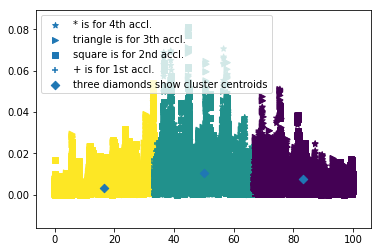

In [24]:
plt.scatter(xs4, ys4, c=labels4, marker='*', label='* is for 4th accl.')
plt.scatter(xs3, ys3, c=labels3, marker=">", label='triangle is for 3th accl.')
plt.scatter(xs2, ys2, c=labels2, marker="s", label='square is for 2nd accl.')
plt.scatter(xs1, ys1, c=labels1, marker="+", label='+ is for 1st accl.')

centroids=model.cluster_centers_
centroid_x=centroids[:,0]
centroids_y=centroids[:,1]
plt.scatter(centroid_x, centroids_y, marker='D', label='three diamonds show cluster centroids')
plt.legend(loc="upper left")

plt.show()

### If we zoom in, we can find different shapes in the clusters